# Comparación entre sensores SeaWiFS y MODIS - KD490

Primero cargaremos las librerias necesarias.

In [22]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy.stats import kde
np.seterr(all='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

Cargaremos en memoria los datos de los sensores para enero de 2003. Los archivos fueron modificados para representar la pura matriz de datos.

In [2]:
# Para el sensor SeaWiFS.

with open('Composicion_(Lt_490).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt490  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt490  = datos_seawifs_lt490.ravel()
datos_seawifs_lt490  = np.array([float(dat) for dat in datos_seawifs_lt490])

In [3]:
# Para el sensor SeaWiFS.

with open('Composicion_(Lt_555).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt555  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt555 = datos_seawifs_lt555.ravel()
datos_seawifs_lt555  = np.array([float(dat) for dat in datos_seawifs_lt555])

Ahora calculamos el kd490 para el SeaWiFS

In [4]:
a_modis = .1853
b_modis = -1.349

def kd490_seawifs(L490, L555):
    return a_modis*(L490/L555)**b_modis

In [5]:
zipped = zip(datos_seawifs_lt490,datos_seawifs_lt555)
datos_seawifsOG = np.array([kd490_seawifs(x,y) for x,y in zipped])
zipped = zip(datos_seawifs_lt490,datos_seawifs_lt555)
datos_seawifs = np.array([kd490_seawifs(x,y)+62.5 for x,y in zipped])


In [6]:
# Para el sensor MODIS. Es lo mismo pero con otro archivo.

with open('Composicion_(Band 12).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b12 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b12 = datos_modis_b12.ravel()
datos_modis_b12 = np.array([float(dat) for dat in datos_modis_b12])

In [7]:
# Para el sensor MODIS. Es lo mismo pero con otro archivo.

with open('Composicion_(Band 10).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b10 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b10 = datos_modis_b10.ravel()
datos_modis_b10 = np.array([float(dat) for dat in datos_modis_b10])

Ahora calculamos el kd490 para Modis

In [8]:
a_modis = .1565
b_modis = -1.54
kw490 = 1/0.016

def kd490_modis(L490, L555):
    return kw490 + a_modis*(L490/L555)**b_modis

In [9]:
zipped = zip(datos_modis_b10,datos_modis_b12)
datos_modis = np.array([kd490_modis(x,y) for x,y in zipped])
#list(datos_modis) 

Ahora calculamos la regresión lineal para los datos de ambos sensores.

In [10]:
# Calculamos los coeficientes del ajuste lineal
a, b = np.polyfit(datos_seawifs , datos_modis, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(datos_seawifs, datos_modis)

Y graficamos los resultados.

r = 0.954
Y = 0.676 X + 20.257


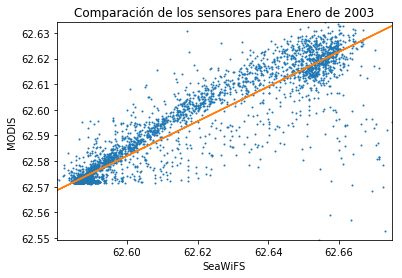

In [11]:
plt.plot(datos_seawifs , datos_modis, linestyle='', marker='o', markersize=1)

plt.xlim(np.min(datos_seawifs), np.max(datos_seawifs))
plt.ylim(np.min(datos_modis), np.max(datos_modis))

plt.xlabel("SeaWiFS")
plt.ylabel("MODIS")

plt.title("Comparación de los sensores para Enero de 2003")

print('r = {0:2.3f}'.format(r[0,1]))
print('Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

# El ajuste calculado.
plt.plot(datos_seawifs , a * datos_seawifs  + b)

r = 0.954
Y = 0.676 X + 62.514


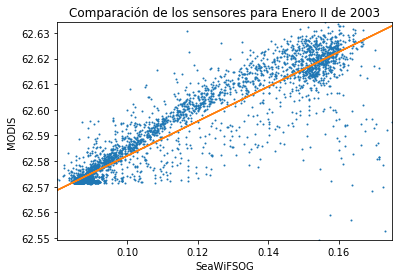

In [12]:
# Calculamos los coeficientes del ajuste lineal
a, b = np.polyfit(datos_seawifsOG , datos_modis, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(datos_seawifsOG, datos_modis)

plt.plot(datos_seawifsOG , datos_modis, linestyle='', marker='o', markersize=1)

plt.xlim(np.min(datos_seawifsOG), np.max(datos_seawifsOG))
plt.ylim(np.min(datos_modis), np.max(datos_modis))

plt.xlabel("SeaWiFSOG")
plt.ylabel("MODIS")

plt.title("Comparación de los sensores para Enero II de 2003")

print('r = {0:2.3f}'.format(r[0,1]))
print('Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

# El ajuste calculado.
plt.plot(datos_seawifsOG , a * datos_seawifsOG  + b)

r = 0.806
Y = 0.637 X + 22.751


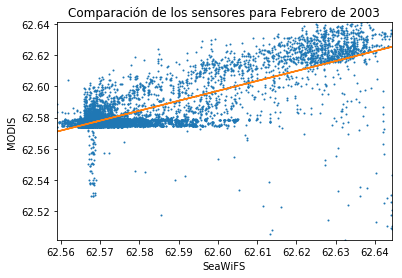

In [13]:
# Para el sensor SeaWiFS.

with open('FEBRERO_2003/SeaWiFS/3_Bandas/Composicion (Lt_490).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt490  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt490  = datos_seawifs_lt490.ravel()
datos_seawifs_lt490  = np.array([float(dat) for dat in datos_seawifs_lt490])

# Para el sensor SeaWiFS.

with open('FEBRERO_2003/SeaWiFS/3_Bandas/Composicion (Lt_555).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt555  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt555 = datos_seawifs_lt555.ravel()
datos_seawifs_lt555  = np.array([float(dat) for dat in datos_seawifs_lt555])

zipped = zip(datos_seawifs_lt490,datos_seawifs_lt555)
datos_seawifs = np.array([kd490_seawifs(x,y)+62.5 for x,y in zipped])

# Para el sensor MODIS. Es lo mismo pero con otro archivo.

with open('FEBRERO_2003/MODIS/3_Bandas/Composicion (B12).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b12 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b12 = datos_modis_b12.ravel()
datos_modis_b12 = np.array([float(dat) for dat in datos_modis_b12])

with open('FEBRERO_2003/MODIS/3_Bandas/Composicion (B10).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b10 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b10 = datos_modis_b10.ravel()
datos_modis_b10 = np.array([float(dat) for dat in datos_modis_b10])

zipped = zip(datos_modis_b10,datos_modis_b12)
datos_modis = np.array([kd490_modis(x,y) for x,y in zipped])

# Calculamos los coeficientes del ajuste lineal
a, b = np.polyfit(datos_seawifs , datos_modis, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(datos_seawifs, datos_modis)

plt.plot(datos_seawifs , datos_modis, linestyle='', marker='o', markersize=1)

plt.xlim(np.min(datos_seawifs), np.max(datos_seawifs))
plt.ylim(np.min(datos_modis), np.max(datos_modis))

plt.xlabel("SeaWiFS")
plt.ylabel("MODIS")

plt.title("Comparación de los sensores para Febrero de 2003")

print('r = {0:2.3f}'.format(r[0,1]))
print('Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

# El ajuste calculado.
plt.plot(datos_seawifs , a * datos_seawifs  + b)

r = nan
Y = nan X + nan


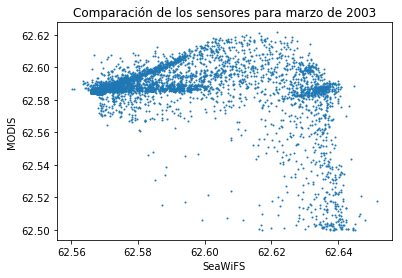

In [24]:
# Para el sensor SeaWiFS.

with open('MARZO_2003/SeaWiFS/Composicion (Lt_490).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt490  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt490  = datos_seawifs_lt490.ravel()
datos_seawifs_lt490  = np.array([float(dat) for dat in datos_seawifs_lt490])

# Para el sensor SeaWiFS.

with open('MARZO_2003/SeaWiFS/Composicion (Lt_555).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt555  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt555 = datos_seawifs_lt555.ravel()
datos_seawifs_lt555  = np.array([float(dat) for dat in datos_seawifs_lt555])

zipped = zip(datos_seawifs_lt490,datos_seawifs_lt555)
datos_seawifs = np.array([kd490_seawifs(x,y)+62.5 for x,y in zipped])

# Para el sensor MODIS. Es lo mismo pero con otro archivo.

with open('MARZO_2003/MODIS/Composicion (B12).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b12 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b12 = datos_modis_b12.ravel()
datos_modis_b12 = np.array([float(dat) for dat in datos_modis_b12])

with open('MARZO_2003/MODIS/Composicion (B10).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b10 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b10 = datos_modis_b10.ravel()
datos_modis_b10 = np.array([float(dat) for dat in datos_modis_b10])

zipped = zip(datos_modis_b10,datos_modis_b12)
datos_modis = np.array([kd490_modis(x,y) for x,y in zipped])

# Calculamos los coeficientes del ajuste lineal
a, b = np.polyfit(datos_seawifs , datos_modis, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(datos_seawifs, datos_modis)

plt.plot(datos_seawifs , datos_modis, linestyle='', marker='o', markersize=1)

plt.xlabel("SeaWiFS")
plt.ylabel("MODIS")

plt.title("Comparación de los sensores para marzo de 2003")

print('r = {0:2.3f}'.format(r[0,1]))
print('Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

# El ajuste calculado.
plt.plot(datos_seawifs , a * datos_seawifs  + b)

In [ ]:
#Valores malos
idx = np.isfinite(datos_modis_b10) & np.isfinite(datos_modis_b12)
print(np.polyfit(datos_modis_b10[idx], datos_modis_b12[idx], 2))
    
idx = np.isfinite(datos_seawifs_lt490) & np.isfinite(datos_seawifs_lt555)
print(np.polyfit(datos_seawifs_lt490[idx], datos_seawifs_lt555[idx], 2))

r = nan
Y = nan X + nan


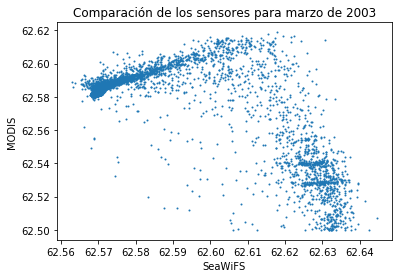

In [37]:
# Para el sensor SeaWiFS.

with open('ABRIL_2003/SeaWiFS/Composicion (Lt_490).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt490  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt490  = datos_seawifs_lt490.ravel()
datos_seawifs_lt490  = np.array([float(dat) for dat in datos_seawifs_lt490])

# Para el sensor SeaWiFS.

with open('ABRIL_2003/SeaWiFS/Composicion (Lt_555).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt555  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt555 = datos_seawifs_lt555.ravel()
datos_seawifs_lt555  = np.array([float(dat) for dat in datos_seawifs_lt555])

zipped = zip(datos_seawifs_lt490,datos_seawifs_lt555)
datos_seawifs = np.array([kd490_seawifs(x,y)+62.5 for x,y in zipped])

# Para el sensor MODIS. Es lo mismo pero con otro archivo.

with open('ABRIL_2003/MODIS/Composicion (B12).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b12 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b12 = datos_modis_b12.ravel()
datos_modis_b12 = np.array([float(dat) for dat in datos_modis_b12])

with open('ABRIL_2003/MODIS/Composicion (B10).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b10 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b10 = datos_modis_b10.ravel()
datos_modis_b10 = np.array([float(dat) for dat in datos_modis_b10])

zipped = zip(datos_modis_b10,datos_modis_b12)
datos_modis = np.array([kd490_modis(x,y) for x,y in zipped])

# Calculamos los coeficientes del ajuste lineal
a, b = np.polyfit(datos_seawifs , datos_modis, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(datos_seawifs, datos_modis)

plt.plot(datos_seawifs , datos_modis, linestyle='', marker='o', markersize=1)

plt.xlabel("SeaWiFS")
plt.ylabel("MODIS")

plt.title("Comparación de los sensores para marzo de 2003")

print('r = {0:2.3f}'.format(r[0,1]))
print('Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

# El ajuste calculado.
plt.plot(datos_seawifs , a * datos_seawifs  + b)

In [41]:
#Valores malos
dx = np.isfinite(datos_modis_b10) & np.isfinite(datos_modis_b12)
print(np.polyfit(datos_modis_b10[idx], datos_modis_b12[idx], 2))
    
idx = np.isfinite(datos_seawifs_lt490) & np.isfinite(datos_seawifs_lt555)
print(np.polyfit(datos_seawifs_lt490[idx], datos_seawifs_lt555[idx], 2))

[-8.98059637e-02  1.22523697e+01 -3.70490068e+02]
[-1.41397090e-03  1.51241150e+00 -4.46806412e+01]


r = nan
Y = nan X + nan


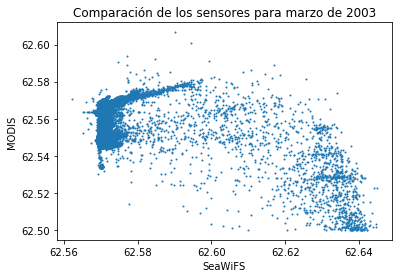

In [43]:
# Para el sensor SeaWiFS.

with open('MAYO_2003/SeaWiFS/Composicion (Lt_490).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt490  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt490  = datos_seawifs_lt490.ravel()
datos_seawifs_lt490  = np.array([float(dat) for dat in datos_seawifs_lt490])

# Para el sensor SeaWiFS.

with open('MAYO_2003/SeaWiFS/Composicion (Lt_555).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt555  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt555 = datos_seawifs_lt555.ravel()
datos_seawifs_lt555  = np.array([float(dat) for dat in datos_seawifs_lt555])

zipped = zip(datos_seawifs_lt490,datos_seawifs_lt555)
datos_seawifs = np.array([kd490_seawifs(x,y)+62.5 for x,y in zipped])

# Para el sensor MODIS. Es lo mismo pero con otro archivo.

with open('MAYO_2003/MODIS/Composicion (B12).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b12 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b12 = datos_modis_b12.ravel()
datos_modis_b12 = np.array([float(dat) for dat in datos_modis_b12])

with open('MAYO_2003/MODIS/Composicion (B10).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b10 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b10 = datos_modis_b10.ravel()
datos_modis_b10 = np.array([float(dat) for dat in datos_modis_b10])

zipped = zip(datos_modis_b10,datos_modis_b12)
datos_modis = np.array([kd490_modis(x,y) for x,y in zipped])

# Calculamos los coeficientes del ajuste lineal
a, b = np.polyfit(datos_seawifs , datos_modis, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(datos_seawifs, datos_modis)

plt.plot(datos_seawifs , datos_modis, linestyle='', marker='o', markersize=1)

plt.xlabel("SeaWiFS")
plt.ylabel("MODIS")

plt.title("Comparación de los sensores para Mayo de 2003")

print('r = {0:2.3f}'.format(r[0,1]))
print('Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

# El ajuste calculado.
plt.plot(datos_seawifs , a * datos_seawifs  + b)

In [44]:
#Valores malos
dx = np.isfinite(datos_modis_b10) & np.isfinite(datos_modis_b12)
print(np.polyfit(datos_modis_b10[idx], datos_modis_b12[idx], 2))
    
idx = np.isfinite(datos_seawifs_lt490) & np.isfinite(datos_seawifs_lt555)
print(np.polyfit(datos_seawifs_lt490[idx], datos_seawifs_lt555[idx], 2))

[-7.11799721e-02  1.02780901e+01 -3.34962433e+02]
[-3.86121798e-03  1.93083217e+00 -6.10691256e+01]


r = nan
Y = nan X + nan


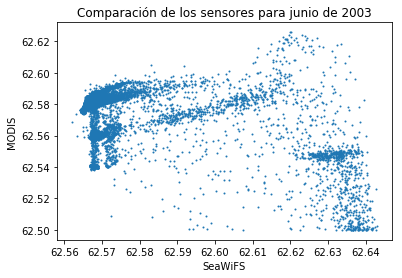

In [46]:
# Para el sensor SeaWiFS.

with open('JUNIO_2003/SeaWiFS/Composicion (Lt_490).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt490  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt490  = datos_seawifs_lt490.ravel()
datos_seawifs_lt490  = np.array([float(dat) for dat in datos_seawifs_lt490])

# Para el sensor SeaWiFS.

with open('JUNIO_2003/SeaWiFS/Composicion (Lt_555).txt') as archivo_seawifs:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_seawifs.readline()
    # Separamos los datos en una matriz.
    datos_seawifs_lt555  = np.array([archivo_seawifs.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_seawifs_lt555 = datos_seawifs_lt555.ravel()
datos_seawifs_lt555  = np.array([float(dat) for dat in datos_seawifs_lt555])

zipped = zip(datos_seawifs_lt490,datos_seawifs_lt555)
datos_seawifs = np.array([kd490_seawifs(x,y)+62.5 for x,y in zipped])

# Para el sensor MODIS. Es lo mismo pero con otro archivo.

with open('JUNIO_2003/MODIS/Composicion (B12).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b12 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b12 = datos_modis_b12.ravel()
datos_modis_b12 = np.array([float(dat) for dat in datos_modis_b12])

with open('JUNIO_2003/MODIS/Composicion (B10).txt') as archivo_modis:
    for _ in range(5):
        # Ignoramos los primeros 5 renglones del archivo.
        archivo_modis.readline()
    # Separamos los datos en una matriz.
    datos_modis_b10 = np.array([archivo_modis.readline().split()
                              for _ in range(127)])

# Desenrrollamos y convertimos a reales.
datos_modis_b10 = datos_modis_b10.ravel()
datos_modis_b10 = np.array([float(dat) for dat in datos_modis_b10])

zipped = zip(datos_modis_b10,datos_modis_b12)
datos_modis = np.array([kd490_modis(x,y) for x,y in zipped])

# Calculamos los coeficientes del ajuste lineal
a, b = np.polyfit(datos_seawifs , datos_modis, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(datos_seawifs, datos_modis)

plt.plot(datos_seawifs , datos_modis, linestyle='', marker='o', markersize=1)

plt.xlabel("SeaWiFS")
plt.ylabel("MODIS")

plt.title("Comparación de los sensores para junio de 2003")

print('r = {0:2.3f}'.format(r[0,1]))
print('Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

# El ajuste calculado.
plt.plot(datos_seawifs , a * datos_seawifs  + b)

In [47]:
#Valores malos
dx = np.isfinite(datos_modis_b10) & np.isfinite(datos_modis_b12)
print(np.polyfit(datos_modis_b10[idx], datos_modis_b12[idx], 2))
    
idx = np.isfinite(datos_seawifs_lt490) & np.isfinite(datos_seawifs_lt555)
print(np.polyfit(datos_seawifs_lt490[idx], datos_seawifs_lt555[idx], 2))

[-5.10445220e-02  6.86705330e+00 -1.89471752e+02]
[ 1.95747214e-03  1.12745076e+00 -3.52420695e+01]
